In [73]:
import requests
import json

import numpy as np
import os
import time
import sys
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from mpltools import annotation

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Untils Defination

In [74]:
cmd_prefix = "./back-end-tests/manyRequest"

In [211]:
def run_command(cmd):
    return os.popen(cmd).read()

def get_run_time(result):
    prefix = "Time Cost:  "
    print(result)
    return float(result[result.index(prefix) + len(prefix):result.index(" ms")])

def get_request_url(pdiameter = 100,
    pdensity = 300,
    velocity = 20,
    theta = 45,
    tdensity = 2500,
    depth = 0,
    distance = 100):
    
    URL = """http://121.36.81.191/cgi-bin/crater.cgi?dist=%d&distanceUnits=1&diam=%d&diameterUnits=1&pdens=%d&pdens_select=0&vel=%d&velocityUnits=1&theta=%d&tdens=%d&wdepth=%d&wdepthUnits=1""" % (distance, pdiameter, pdensity, velocity, theta, tdensity, depth)
    return URL

In [212]:
def record_times_get(times, url, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params))
        if sleep:
            time.sleep(1*60)
    return records

def record_time_post(times, url,
                     pdiameter = 100,
                    pdensity = 300,
                    velocity = 20,
                    theta = 45,
                    tdensity = 2500,
                    depth = 0,
                    distance = 100,
                    sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
    pdensity, pdiameter, velocity, theta, tdensity, depth, distance)
    
    for t in times:
        params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params + params_data))
        if sleep:
            time.sleep(1*60)
        
    return records
    
    

In [115]:
run_command("git pull && cd back-end-tests/ && go build manyRequest.go")

From github.com:acse-dx121/impact-effects-web
   6362a2d..94a8e0a  main       -> origin/main


'Updating 6362a2d..94a8e0a\nFast-forward\n Test/back-end-tests/manyRequest.go | 32 +++++++++++++++-----------------\n 1 file changed, 15 insertions(+), 17 deletions(-)\n'

## Collect Runtime

### Old Web Tool

In [218]:
times

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480]

In [219]:
records = record_times_get(times, get_request_url(), sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  1498 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  1923 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  2949 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&di

### new web tool

In [220]:
records_post = record_time_post(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  831 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  106 ms



KeyboardInterrupt: 

In [ ]:
records_redis = record_time_post(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

### plot the results

In [216]:
x = list(records.keys())
y = [records[k] for k in x]
print((x,y))

x2 = list(records_post.keys())
y2 = [records_post[k] for k in x]

x3 = list(records_redis.keys())
y3 = [records_redis[k] for k in x]

data_index = [x, x2, x3]
data = [y, y2, y3]


([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480], [1610.0, 1935.0, 2943.0, 3930.0, 4811.0, 5790.0, 6750.0, 7794.0, 8950.0, 9683.0, 10807.0, 11622.0, 12728.0, 13554.0, 14720.0, 16041.0, 16771.0, 17461.0, 18745.0, 19741.0, 20639.0, 22127.0, 22697.0, 23662.0])


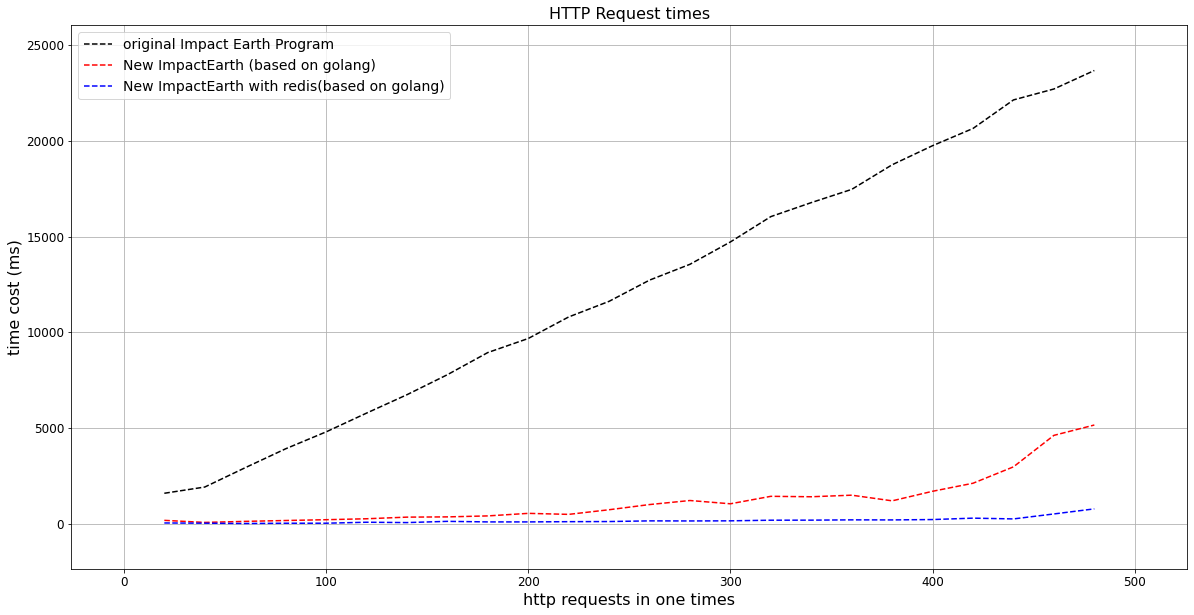

In [217]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data)):
    ax1.plot(data_index[i], data[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_new_valid_2.png")

## Test with random Request

In [100]:
import random

In [141]:
times = times = [i for i in range(1, 500, 50)]

In [221]:
def random_float(down, upper):
    return random.random() * (upper - down) + down

def record_times_get_random(times, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        density_choice = random.randint(0,2)
        tdensity = 2500
        depth = 0
        
        if density_choice == 0:
            tdensity = 1000
            depth = random.random()*1000 + 1000
        elif density_choice == 1:
            pass
        else:
            tdensity = 2750
            depth = 0
        
        pdiameter = 10 ** random.randint(1, 5)
        scaller = 0.4
        
        url = get_request_url(pdiameter = pdiameter, # m
                        pdensity = random_float(1000, 8000),
                        velocity = random_float(11.2, 72),
                        theta = random_float(10, 80),
                        tdensity = tdensity,
                        depth = depth, 
                        distance = pdiameter * scaller) # scaller = 40 % km
        # print(url)
        params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params))

        if sleep:
            time.sleep(90)

    return records

def record_time_post_random(times, url, sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    for t in times:
        density_choice = random.randint(0,2)
        tdensity = 2500
        depth = 0
        
        if density_choice == 0:
            tdensity = 1000
            depth = random.random()*1000 + 1000
        elif density_choice == 1:
            pass
        else:
            tdensity = 2750
            depth = 0
        
        pdiameter = 10 ** random.randint(1, 5)
        scaller = 0.4
        
        pdiameter = pdiameter # m
        pdensity = random_float(1000, 8000)
        velocity = random_float(11.2, 72)
        theta = random_float(10, 80)
        tdensity = tdensity
        depth = depth
        distance = pdiameter * scaller
        
        params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
        pdensity, pdiameter, velocity, theta, tdensity, depth, distance)
        
        params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
        records[t] = get_run_time(run_command(cmd = cmd_prefix + params + params_data))

        if sleep:
            time.sleep(90)

        
    return records
    
    

In [222]:
times

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480]

In [223]:
records_random = record_times_get_random(times, sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=400&distanceUnits=1&diam=1000&diameterUnits=1&pdens=1068&pdens_select=0&vel=39&velocityUnits=1&theta=75&tdens=2750&wdepth=0&wdepthUnits=1 
Time Cost:  972 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=4&distanceUnits=1&diam=10&diameterUnits=1&pdens=7459&pdens_select=0&vel=37&velocityUnits=1&theta=71&tdens=2750&wdepth=0&wdepthUnits=1 
Time Cost:  1939 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=4&distanceUnits=1&diam=10&diameterUnits=1&pdens=2126&pdens_select=0&vel=42&velocityUnits=1&theta=58&tdens=2750&wdepth=0&wdepthUnits=1 
Time Cost:  2986 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=400&distanceUnits=1&diam=

In [239]:
records_post_random = record_time_post_random(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  55 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  192 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  231 ms

http://121.36.81.191:50052/simulator
Run request for 100 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  240 ms

http://121.36.81.191:50052/simulator
Run request for 120 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  338 ms

http://121.36.81.191:50052/simulator
Run request for 140 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  390 ms

http://121.36.81.191:50052/simulator
Run request for 160 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  432 ms

http://121.36.81.191:500

In [240]:
records_redis_random = record_time_post_random(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  67 ms

http://121.36.81.191:50052/simulator
Run request for 40 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  76 ms

http://121.36.81.191:50052/simulator
Run request for 60 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  163 ms

http://121.36.81.191:50052/simulator
Run request for 80 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  243 ms

http://121.36.81.191:50052/simulator
Run request for 100 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  223 ms

http://121.36.81.191:50052/simulator
Run request for 120 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  101 ms

http://121.36.81.191:50052/simulator
Run request for 140 times to with Redis URL: http://121.36.81.191:50052/sim

In [243]:
records_post_random, records_random, records_redis_random

({20: 55.0,
  40: 105.0,
  60: 192.0,
  80: 231.0,
  100: 240.0,
  120: 338.0,
  140: 390.0,
  160: 432.0,
  180: 472.0,
  200: 514.0,
  220: 557.0,
  240: 914.0,
  260: 723.0,
  280: 794.0,
  300: 771.0,
  320: 964.0,
  340: 878.0,
  360: 929.0,
  380: 1180.0,
  400: 1687.0,
  420: 1147.0,
  440: 2959.0,
  460: 1278.0,
  480: 3207.0},
 {20: 972.0,
  40: 1939.0,
  60: 2986.0,
  80: 3968.0,
  100: 4981.0,
  120: 5848.0,
  140: 6826.0,
  160: 8008.0,
  180: 8772.0,
  200: 9709.0,
  220: 10606.0,
  240: 11807.0,
  260: 12933.0,
  280: 13652.0,
  300: 14607.0,
  320: 15771.0,
  340: 16562.0,
  360: 17774.0,
  380: 18536.0,
  400: 19516.0,
  420: 20566.0,
  440: 21719.0,
  460: 22571.0,
  480: 23459.0},
 {20: 67.0,
  40: 76.0,
  60: 163.0,
  80: 243.0,
  100: 223.0,
  120: 101.0,
  140: 64.0,
  160: 412.0,
  180: 298.0,
  200: 206.0,
  220: 586.0,
  240: 588.0,
  260: 698.0,
  280: 810.0,
  300: 258.0,
  320: 217.0,
  340: 954.0,
  360: 249.0,
  380: 253.0,
  400: 353.0,
  420: 536.0,
  440

([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480], [972.0, 1939.0, 2986.0, 3968.0, 4981.0, 5848.0, 6826.0, 8008.0, 8772.0, 9709.0, 10606.0, 11807.0, 12933.0, 13652.0, 14607.0, 15771.0, 16562.0, 17774.0, 18536.0, 19516.0, 20566.0, 21719.0, 22571.0, 23459.0])


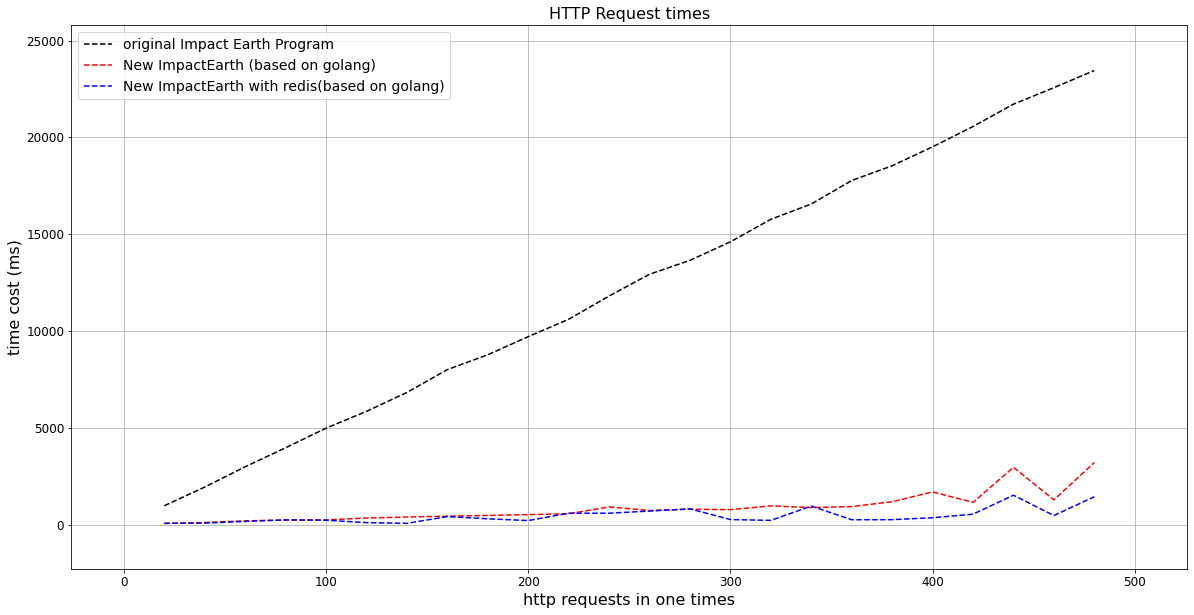

In [244]:
x_random = list(records_random.keys())
y_random = [records_random[k] for k in x_random]
print((x_random,y_random))

x2_random = list(records_post_random.keys())
y2_random = [records_post_random[k] for k in x_random]

x3_random = list(records_redis_random.keys())
y3_random = [records_redis_random[k] for k in x_random]

data_index_random = [x_random, x2_random, x3_random]
data_random = [y_random, y2_random, y3_random]

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data_random)):
    ax1.plot(data_index_random[i], data_random[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_random_with_valid_parameter.png")


[[972.0, 1939.0, 2986.0, 3968.0, 4981.0, 5848.0, 6826.0, 8008.0, 8772.0, 9709.0, 10606.0, 11807.0, 12933.0, 13652.0, 14607.0, 15771.0, 16562.0, 17774.0, 18536.0, 19516.0, 20566.0, 21719.0, 22571.0, 23459.0], [55.0, 105.0, 192.0, 231.0, 240.0, 338.0, 390.0, 432.0, 472.0, 514.0, 557.0, 914.0, 723.0, 794.0, 771.0, 964.0, 878.0, 929.0, 1180.0, 1687.0, 1147.0, 2959.0, 1278.0, 3207.0], [67.0, 76.0, 163.0, 243.0, 223.0, 101.0, 64.0, 412.0, 298.0, 206.0, 586.0, 588.0, 698.0, 810.0, 258.0, 217.0, 954.0, 249.0, 253.0, 353.0, 536.0, 1517.0, 468.0, 1437.0], [1610.0, 1935.0, 2943.0, 3930.0, 4811.0, 5790.0, 6750.0, 7794.0, 8950.0, 9683.0, 10807.0, 11622.0, 12728.0, 13554.0, 14720.0, 16041.0, 16771.0, 17461.0, 18745.0, 19741.0, 20639.0, 22127.0, 22697.0, 23662.0], [197.0, 89.0, 144.0, 189.0, 231.0, 280.0, 365.0, 378.0, 429.0, 562.0, 509.0, 751.0, 1021.0, 1232.0, 1061.0, 1451.0, 1428.0, 1510.0, 1215.0, 1714.0, 2133.0, 2988.0, 4630.0, 5170.0], [61.0, 49.0, 33.0, 47.0, 48.0, 99.0, 81.0, 145.0, 116.0, 11

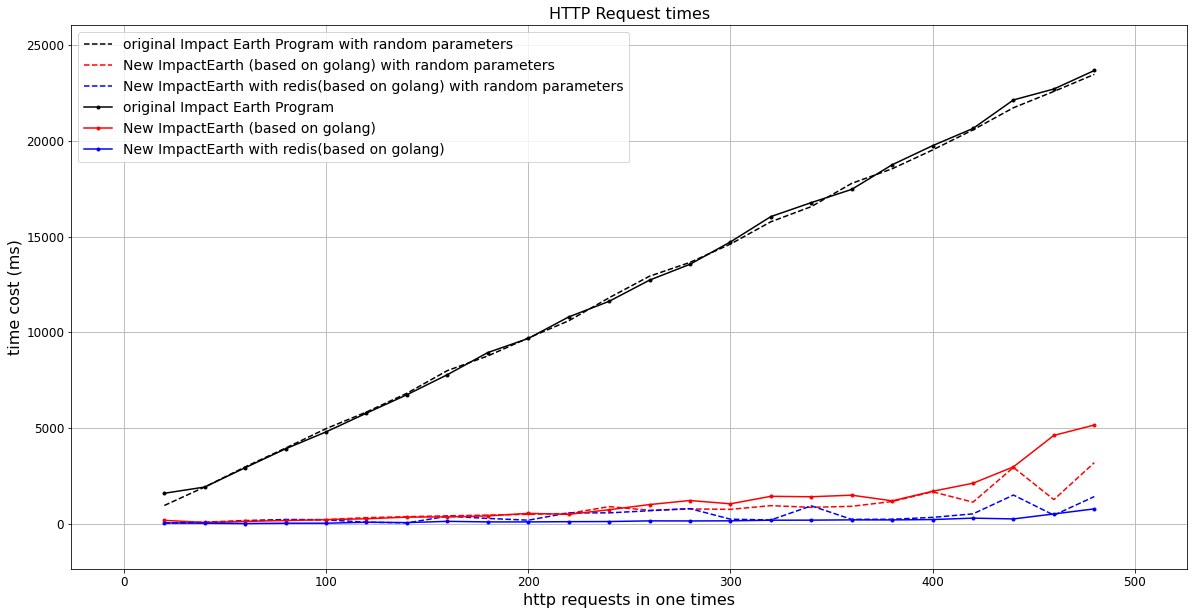

In [245]:
data_total = data_random + data
print(data_total)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

# color = ['k', 'r', 'b', 'g', 'c', 'y']
color = ['k', 'r', 'b']
shape = ['-','.']
labels = ["original Impact Earth Program with random parameters", "New ImpactEarth (based on golang) with random parameters", "New ImpactEarth with redis(based on golang) with random parameters", 
         "original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data_total)):
    ax1.plot(data_index[0], data_total[i], '%s%s-'%(color[i%3], shape[i//3]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_total.png")


In [176]:
random.random()*1000 + 1000

1427.0276143838205